## Processing coral presence ground truths for soft labelling and general tasks

In [1]:
def try_convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

In [4]:
import pandas as pd

print(pd. __version__)

2.1.1


In [23]:
substrate_csv.date

0         20-April-16
1         20-April-16
2         20-April-16
3         20-April-16
4         20-April-16
             ...     
800327     27-July-04
800328     27-July-04
800329     27-July-04
800330     27-July-04
800331     27-July-04
Name: date, Length: 800332, dtype: object

In [37]:
# load in substrate. Will need to change data location. Can I use a URL?
# check out environment consistencies: want to use mamba and delete others

# this could be useful: https://annefou.github.io/metos_python/04-plotting/

import pandas as pd
import numpy as np

# read in spreadsheet.
# DATES NOT PARSING PROPERLY
substrate_csv = pd.read_csv("/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/temp_datasets/Substrate.csv",
    parse_dates=["date"], date_format="%d-%B-%y"
    )

substrate_csv.head()

/var/folders/07/lkvjp1kd47578txv8q6wyb9w0000gn/T/ipykernel_71797/3365727675.py:11: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  substrate_csv = pd.read_csv("/Users/orlandotimmerman/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/coralshift/local_datasets/Substrate.csv",


,site_id,survey_id,static_descriptors_reef_id (archived field),reef_name,country,state_province_island,city_town,region,coordinates_in_decimal_degree_format,longitude_degrees,...,latitude_cardinal_direction,year,date,depth (m),substrate_code,segment_code,total,substrate_recorded_by,errors,what_errors
0,6a8719bb-91fe-46c1-9635-37fb1f022ea9,000887f9-b8c4-4c43-bc63-700c0e8b385b,119.18.33.5E.11.0.57.5N,Masigasig/Esteban Reef,Philippines,Palawan,Taytay,Indo-Pacific,"11.015972, 119.309306",119,...,N,2016,2016-04-20,3.0,HC,S1,22,NaN,False,NaN
1,6a8719bb-91fe-46c1-9635-37fb1f022ea9,000887f9-b8c4-4c43-bc63-700c0e8b385b,119.18.33.5E.11.0.57.5N,Masigasig/Esteban Reef,Philippines,Palawan,Taytay,Indo-Pacific,"11.015972, 119.309306",119,...,N,2016,2016-04-20,3.0,HC,S2,25,NaN,False,NaN
2,6a8719bb-91fe-46c1-9635-37fb1f022ea9,000887f9-b8c4-4c43-bc63-700c0e8b385b,119.18.33.5E.11.0.57.5N,Masigasig/Esteban Reef,Philippines,Palawan,Taytay,Indo-Pacific,"11.015972, 119.309306",119,...,N,2016,2016-04-20,3.0,HC,S3,27,NaN,False,NaN
3,6a8719bb-91fe-46c1-9635-37fb1f022ea9,000887f9-b8c4-4c43-bc63-700c0e8b385b,119.18.33.5E.11.0.57.5N,Masigasig/Esteban Reef,Philippines,Palawan,Taytay,Indo-Pacific,"11.015972, 119.309306",119,...,N,2016,2016-04-20,3.0,HC,S4,26,NaN,False,NaN
4,6a8719bb-91fe-46c1-9635-37fb1f022ea9,000887f9-b8c4-4c43-bc63-700c0e8b385b,119.18.33.5E.11.0.57.5N,Masigasig/Esteban Reef,Philippines,Palawan,Taytay,Indo-Pacific,"11.015972, 119.309306",119,...,N,2016,2016-04-20,3.0,HC/B,S1,0,NaN,False,NaN


In [46]:
# make working copy: not sure how necessary this is
df_substrate = substrate_csv

In [41]:
df_substrate.total

0         22
1         25
2         27
3         26
4          0
          ..
800327     5
800328     0
800329     0
800330     0
800331     0
Name: total, Length: 800332, dtype: object

In [47]:
substrate_csv.total.iloc[0]

# some entries in "total" column are "O" rather than "0"!
df_substrate.total.replace("O", "0")
df_substrate["total"] = pd.to_numeric(df_substrate['total'], errors='coerce').fillna(0).astype('int64')


In [56]:
(df_substrate.date.iloc[0])

Timestamp('2016-04-20 00:00:00')

In [57]:
# would a function be necessary here? When are they necessary for such specific data processing tasks???

# make working copy: not sure how necessary this is
df_substrate = substrate_csv
# df_substrate.date = pd.to_datetime(df_substrate.date, format="%d-%B-%y")

# Split the column on the comma
split_series = df_substrate["coordinates_in_decimal_degree_format"].str.split(',')

# strip any leading/trailing spaces
split_series = split_series.apply(lambda x: [(val.strip()) for val in x])

# convert to float if possible
out = split_series[:].apply(lambda x: [try_convert_to_float(val.strip()) for val in x])

# write to separate columns in df
df_substrate[["lat_decimal", "lon_decimal"]] = pd.DataFrame(out.to_list(), index=df_substrate.index)

In [58]:
# nans aren't the same
print("lon_decimal nans:", sum(df_substrate["lon_decimal"].isna()))
print("lat_decimal nans:", sum(df_substrate["lat_decimal"].isna()))

# remove all rows containing a nan in either of these two columns
df_substrate_processed = df_substrate.dropna(subset=["lon_decimal", "lat_decimal"])

lon_decimal nans: 1716
lat_decimal nans: 1612


In [59]:
df_substrate_processed.date

0        2016-04-20
1        2016-04-20
2        2016-04-20
3        2016-04-20
4        2016-04-20
            ...    
800327   2004-07-27
800328   2004-07-27
800329   2004-07-27
800330   2004-07-27
800331   2004-07-27
Name: date, Length: 798616, dtype: datetime64[ns]

/var/folders/07/lkvjp1kd47578txv8q6wyb9w0000gn/T/ipykernel_71797/1917432746.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


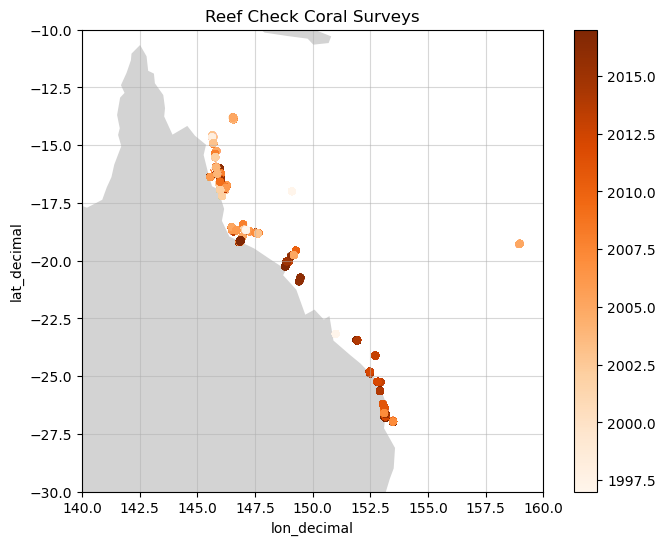

In [62]:
# limit df to lats/lons of interest
df_substrate_gbr = df_substrate_processed[
    df_substrate_processed.lon_decimal.between(142,159) & df_substrate_processed.lat_decimal.between(-27,-10)
    ]

import geopandas as gpd
from matplotlib.dates import date2num
import matplotlib.pyplot as plt


# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
# countries[countries["name"] == "Australia"].plot(color="lightgrey",
#                                                  ax=ax)
countries.plot(color="lightgrey",ax=ax)
# plot points
df_substrate_gbr.plot(x="lon_decimal", y="lat_decimal", kind="scatter", c=(df_substrate_gbr['year']),
    colormap="Oranges", title="Reef Check Coral Surveys", ax=ax)

ax.set_xlim([140,160])
ax.set_ylim([-30,-10])

ax.grid(alpha=0.5)
plt.show()

<GeoAxes: title={'center': 'Reef Check Coral Surveys'}, xlabel='lon_decimal', ylabel='lat_decimal'>

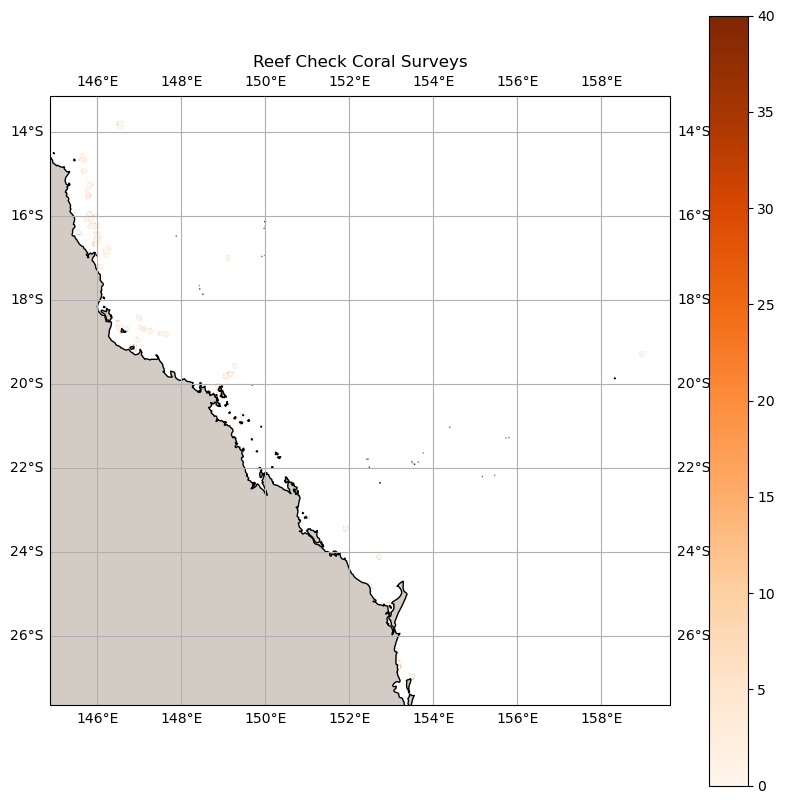

In [124]:
df = df_substrate_gbr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.PlateCarree())

# plot as points
ax.add_feature(
    cfeature.NaturalEarthFeature(
        "physical", "land", "10m", edgecolor="k", facecolor="#d2ccc4"
    )
)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

first_month = df["date"].min().strftime("%b %Y")
last_month = df["date"].max().strftime("%b %Y")


df.plot(x="lon_decimal", y="lat_decimal", kind="scatter", s=5, c=df["total"], cmap="Oranges",
        title="Reef Check Coral Surveys", ax=ax)

In [118]:
# Define the bounding box for your raster
min_lat, max_lat = -30, -10
min_lon, max_lon = 140, 160
resolution = 0.1  # 1-degree resolution

# Calculate the number of rows and columns in the raster
num_rows = int((max_lat - min_lat) / resolution)
num_cols = int((max_lon - min_lon) / resolution)

# Initialize an empty raster (of zeros)
raster = np.zeros((num_rows, num_cols), dtype=int)

# Convert latitude and longitude points to row and column indices of raster
row_indices = ((max_lat - df['lat_decimal']) // resolution).astype(int)
col_indices = ((df['lon_decimal'] - min_lon) // resolution).astype(int)

# Filter coordinates that fall within the bounding box: this produces a binary mask
# valid_indices = ((min_lat <= df['lat_decimal']) & (df['lat_decimal'] <= max_lat) &
#                  (min_lon <= df['lon_decimal']) & (df['lon_decimal'] <= max_lon))

# # Update the raster with counts of valid coordinates
# raster[row_indices[valid_indices], col_indices[valid_indices]] += 1

# list of row, column indices corresponding to each latitude/longitude point
valid_coordinates = list(zip(row_indices[valid_indices], col_indices[valid_indices]))
# count number of repeated index pairs and return unique
unique_coordinates, counts = np.unique(valid_coordinates, axis=0, return_counts=True)
# assign number of counts to each unique raster
raster[unique_coordinates[:, 0], unique_coordinates[:, 1]] = counts

In [130]:
valid_coordinates[0]

(169, 134)

In [100]:
df["lon_decimal"]

1196      153.483889
1197      153.483889
1198      153.483889
1199      153.483889
1200      153.483889
             ...    
800119    149.183333
800120    149.183333
800121    149.183333
800122    149.183333
800123    149.183333
Name: lon_decimal, Length: 40664, dtype: float64

In [125]:
len(df)

40664

In [119]:
import xarray as xa

xa_raster = xa.DataArray(data=raster,
    dims=["latitude", "longitude"],
    coords={
        "latitude": np.arange(-10,-30,-0.1),
        "longitude": np.arange(140,160,0.1)
    # adding in date complex since many different surveys per cell value. Will vary with resolution
    # time=df[date]
    },
    attrs=dict(
        description="Rasterised Reef Check coral presence survey data"
    ))


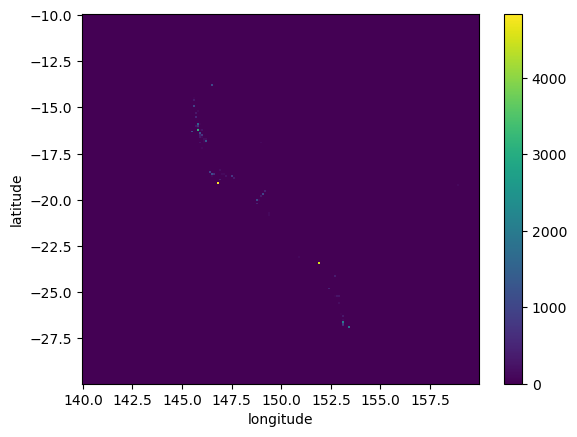

In [121]:
xa_raster.plot()
# plt.xlim([-16,-15])
# plt.xlim([145,146])